# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# https://towardsdatascience.com/why-you-should-learn-catboost-now-390fb3895f76
from catboost import CatBoostClassifier, Pool

# !pip install shap
import shap
shap.initjs()

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#Create function for plotting confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good'])

In [6]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [7]:
unzip_data("GermanCredit.csv.zip")

In [8]:
GC = pd.read_csv("GermanCredit.csv")

In [9]:
GC.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [10]:
GC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

## Obtaining some info from UCI 

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

## Create the label and Feature DataFrame


In [11]:
Y = 1*(GC['Class']=='Good')
Y.mean()

0.7

In [12]:
GCx = GC.drop('Class',axis=1)
print(round(GCx.corr(),2))

                                        Duration  Amount  \
Duration                                    1.00    0.62   
Amount                                      0.62    1.00   
InstallmentRatePercentage                   0.07   -0.27   
ResidenceDuration                           0.03    0.03   
Age                                        -0.04    0.03   
...                                          ...     ...   
Housing.ForFree                             0.19    0.20   
Job.UnemployedUnskilled                    -0.04   -0.03   
Job.UnskilledResident                      -0.18   -0.16   
Job.SkilledEmployee                         0.06   -0.09   
Job.Management.SelfEmp.HighlyQualified      0.15    0.32   

                                        InstallmentRatePercentage  \
Duration                                                     0.07   
Amount                                                      -0.27   
InstallmentRatePercentage                                    1.00   
Res

## Run logit model, with all and with selected variables

In [13]:
import statsmodels.api as sm
X2 = sm.add_constant(GCx) 
Xx = pd.concat([X2.iloc[:,:13],X2.iloc[:,15:26],X2.iloc[:,28:30],X2.iloc[:,31:39],X2.iloc[:,41:44],X2.iloc[:,46:51],\
                X2.iloc[:,53:56],X2.iloc[:,58:61]],axis=1)
model = sm.Logit(Y, Xx).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.448051
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                           47
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.2665
Time:                        18:18:11   Log-Likelihood:                -448.05
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.449e-43
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  4.3927      1.683    

In [14]:
X2 = sm.add_constant(GCx) 
Xx = pd.concat([X2.iloc[:,:2],X2.iloc[:,9:12],X2.iloc[:,33:37],X2.iloc[:,54:56]],axis=1)
model = sm.Logit(Y, Xx).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.502515
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.1774
Time:                        18:18:12   Log-Likelihood:                -502.52
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.248e-41
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.7954      0.636      5.963     

## Using LogisticRegreesionClassifier with GridSearch for Hyperparameters

In [19]:
X=GCx    # [['Duration','Age']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [24]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("BEST PARAMS", logreg_cv.best_params_)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

BEST PARAMS {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [29]:
lr = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.78


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([[ 41,  41],
       [ 25, 193]])

## Decision Tree Classifier, with GridSearch

In [26]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [31]:
tree_cv = GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("BEST PARAMS", tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

BEST PARAMS {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.7171428571428571


In [32]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, max_features='sqrt',\
                              min_samples_leaf=1, min_samples_split=2)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7266666666666667


array([[  0,  82],
       [  0, 218]])

In [33]:

X0=GCx[['Duration','CheckingAccountStatus.lt.0','CheckingAccountStatus.0.to.200','OtherInstallmentPlans.None']]
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree.fit(X0_train, Y0_train)
y_pred = tree.predict(X0_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7266666666666667


array([[  0,  82],
       [  0, 218]])

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
# !pip install -q dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [34]:
# Your code here! 
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [35]:
cname = GCx.columns
cname

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [36]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',\
                              min_samples_leaf=4, min_samples_split=10)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.74


array([[ 34,  48],
       [ 30, 188]])

In [37]:
viz = dtreeviz(tree,
               X_train,
               Y_train,
               target_name='Good',  # this name will be displayed at the leaf node
               feature_names=cname,
               title="German Credit",
               title_fontsize=16,
               colors = {"title":"purple"}
              )

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


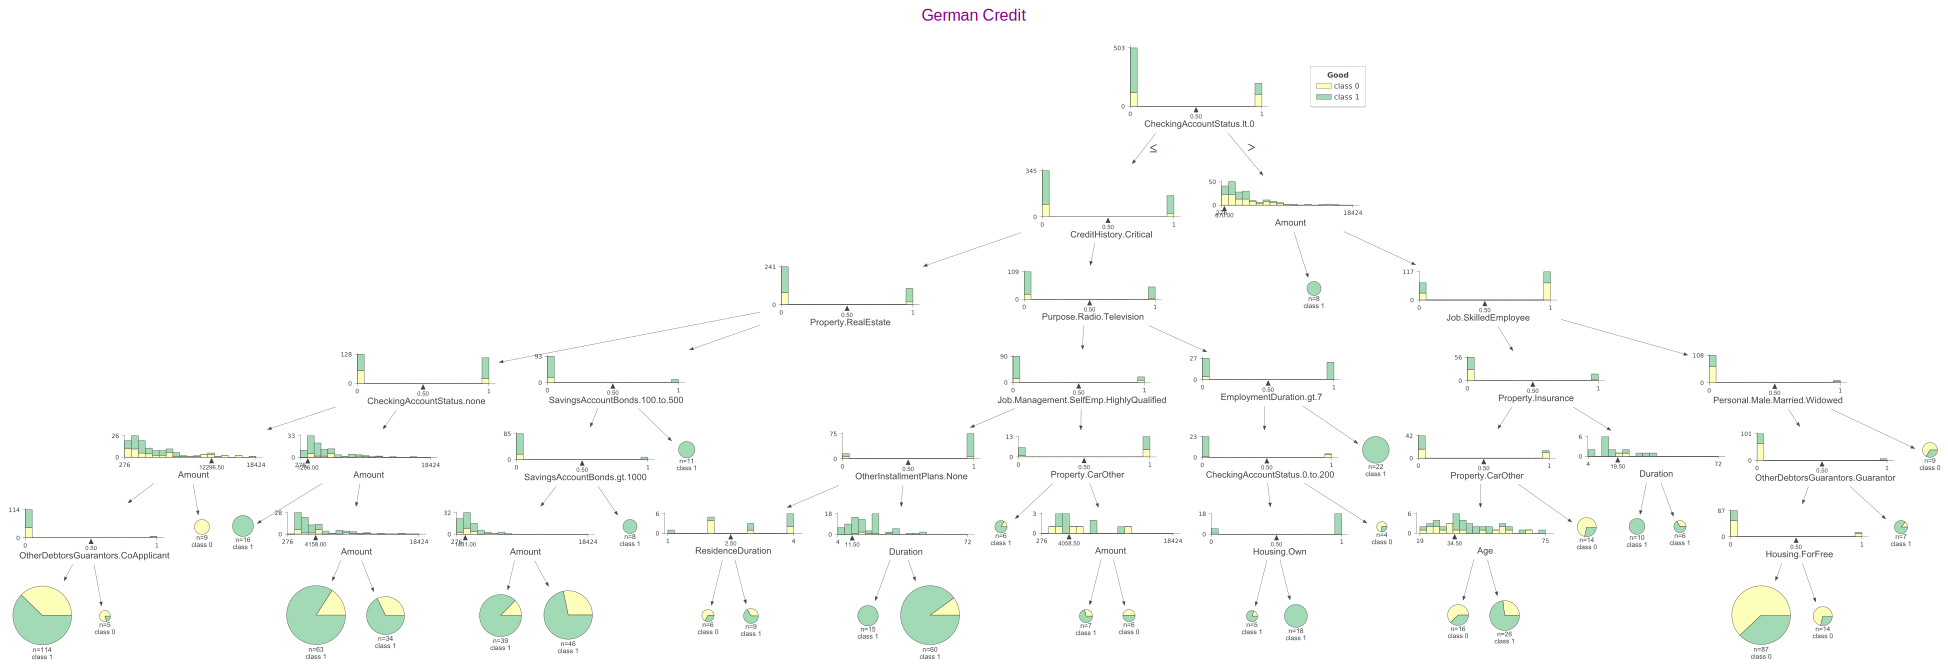

In [38]:
viz

In [39]:
type(viz)

dtreeviz.trees.DTreeViz

In [40]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='auto',\
                              min_samples_leaf=4, min_samples_split=10)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7166666666666667


array([[ 25,  57],
       [ 28, 190]])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


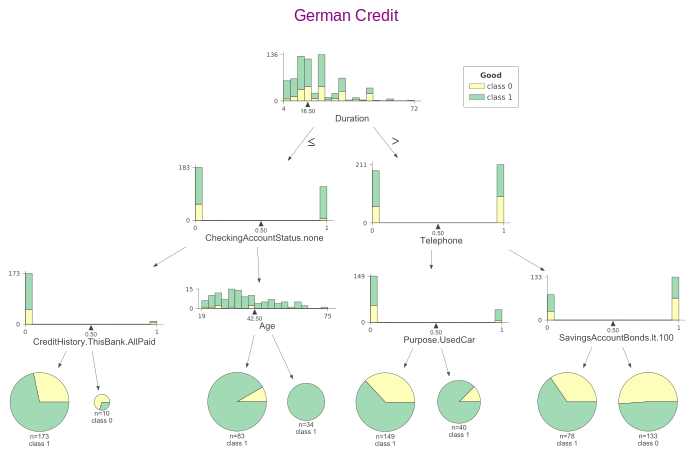

In [41]:
viz = dtreeviz(tree,
               X_train,
               Y_train,
               target_name='Good',  # this name will be displayed at the leaf node
               feature_names=cname,
               title="German Credit",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


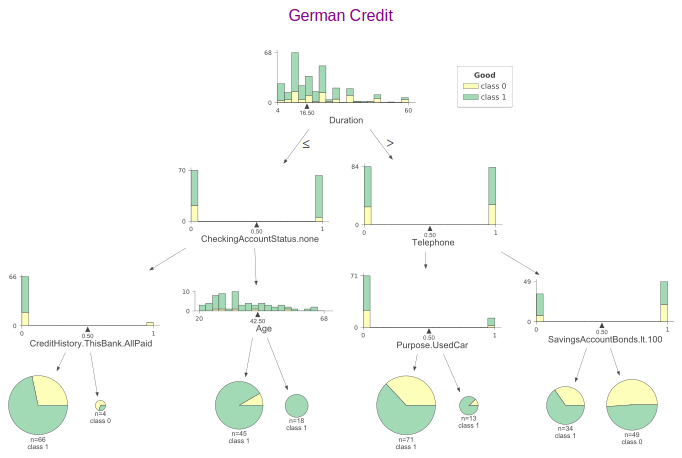

In [42]:
viz = dtreeviz(tree,
               X_test,
               Y_test,
               target_name='Good',  # this name will be displayed at the leaf node
               feature_names=cname,
               title="German Credit",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz

In [43]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='auto',\
                              min_samples_leaf=4, min_samples_split=10)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7266666666666667


array([[  0,  82],
       [  0, 218]])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


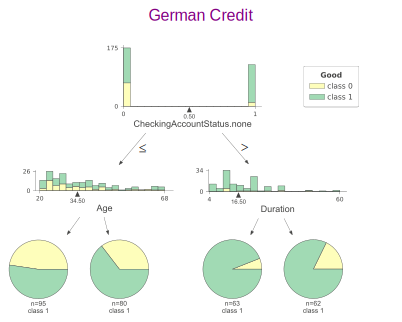

In [44]:
viz = dtreeviz(tree,
               X_test,
               Y_test,
               target_name='Good',  # this name will be displayed at the leaf node
               feature_names=cname,
               title="German Credit",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz

In [45]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto',\
                              min_samples_leaf=4, min_samples_split=10)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7266666666666667


array([[  0,  82],
       [  0, 218]])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


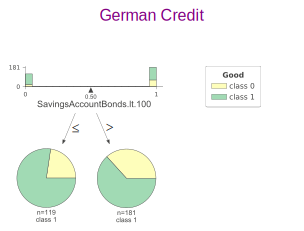

In [46]:
viz = dtreeviz(tree,
               X_test,
               Y_test,
               target_name='Good',  # this name will be displayed at the leaf node
               feature_names=cname,
               title="German Credit",
               title_fontsize=16,
               colors = {"title":"purple"}
              )
viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [47]:
# Your code here! :)
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=0.12)
rf.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

accuracy =  0.7266666666666667


array([[  0,  82],
       [  0, 218]])

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

## visualize the importance of features from your Random Forests model!

OtherInstallmentPlans.None        0.002699
EmploymentDuration.4.to.7         0.002743
EmploymentDuration.1.to.4         0.004242
Job.SkilledEmployee               0.006434
SavingsAccountBonds.Unknown       0.007341
EmploymentDuration.gt.7           0.007902
ResidenceDuration                 0.011247
Telephone                         0.011465
Personal.Male.Single              0.012962
Personal.Female.NotSingle         0.013463
Property.CarOther                 0.016294
NumberExistingCredits             0.019365
CheckingAccountStatus.0.to.200    0.022187
Property.RealEstate               0.025720
CreditHistory.PaidDuly            0.027270
Housing.Own                       0.027745
Purpose.NewCar                    0.028002
Purpose.Radio.Television          0.032174
InstallmentRatePercentage         0.038333
CreditHistory.Critical            0.059039
Age                               0.064448
Amount                            0.065504
SavingsAccountBonds.lt.100        0.075322
CheckingAcc

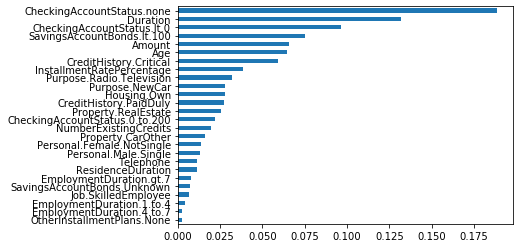

In [49]:
importance_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importance = importance_rf.sort_values()[35:]
print(sorted_importance)
sorted_importance.plot(kind='barh')

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
# ! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [50]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
GC['Y'] = Y

In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=0.12)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

In [ ]:
pdp_sex = pdp.pdp_isolate(model=rf,
                          dataset=GC,
                          model_features='Age',
                          feature='Duration')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_sex, feature_name='Duration')


In [ ]:
""" Not working
from pdpbox import info_plots, get_dataset

test_titanic = get_dataset.titanic()
titanic_data = test_titanic['data']
titanic_target = test_titanic['target']
fig, axes, summary_df = info_plots.target_plot(
    df=titanic_data, feature='Sex', feature_name='Sex', target=titanic_target)

"""

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
# ! conda install -c anaconda py-xgboost

In [ ]:
# ! conda install -c conda-forge catboost


In [ ]:
# ! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

## Comparison of Naive, Logistic, Tree, Random Forest, Stochastic Gradient, Adaboost, CatBoost, LightGBM

In [66]:
X=GCx    # [['Duration','Age']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [67]:
y_pred = Y_test - Y_test + 1
print("Naive accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Naive accuracy =  0.72


array([[  0,  84],
       [  0, 216]])

In [68]:
lr = LogisticRegression(C=1)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("LogisticRegression accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

LogisticRegression accuracy =  0.7433333333333333


array([[ 43,  41],
       [ 36, 180]])

In [69]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto',\
                              min_samples_leaf=4, min_samples_split=10)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)
print("Tree accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Tree accuracy =  0.66


array([[ 38,  46],
       [ 56, 160]])

In [70]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=0.12)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print("Random Forest accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

Random Forest accuracy =  0.72


array([[  0,  84],
       [  0, 216]])

In [71]:
gbf = GradientBoostingClassifier()
gbf.fit(X_train, Y_train)
y_pred = gbf.predict(X_test)
print("accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

accuracy =  0.7433333333333333


array([[ 32,  52],
       [ 25, 191]])

In [72]:
gbf = GradientBoostingClassifier(max_depth=2, n_estimators=300, subsample=0.8, max_features=0.2)
gbf.fit(X_train, Y_train)
y_pred = gbf.predict(X_test)
print("GradientBoosting accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

GradientBoosting accuracy =  0.75


array([[ 42,  42],
       [ 33, 183]])

In [73]:
dt = DecisionTreeClassifier(max_depth=1)
adb = AdaBoostClassifier(base_estimator=dt, n_estimators = 200)
y_pred = gbf.predict(X_test)
print("AdaBoost accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

AdaBoost accuracy =  0.75


array([[ 42,  42],
       [ 33, 183]])

In [74]:
cb = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)
cb.fit(X_train, Y_train, plot=True, eval_set=(X_test, Y_test))
y_pred = cb.predict(X_test)
print("CatBoost accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test, y_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6522354	test: 0.6520408	best: 0.6520408 (0)	total: 1.33ms	remaining: 398ms
1:	learn: 0.6261566	test: 0.6258485	best: 0.6258485 (1)	total: 3.14ms	remaining: 468ms
2:	learn: 0.6019628	test: 0.6106708	best: 0.6106708 (2)	total: 5.36ms	remaining: 531ms
3:	learn: 0.5801959	test: 0.5923505	best: 0.5923505 (3)	total: 7.03ms	remaining: 520ms
4:	learn: 0.5605308	test: 0.5794806	best: 0.5794806 (4)	total: 9ms	remaining: 531ms
5:	learn: 0.5428597	test: 0.5756677	best: 0.5756677 (5)	total: 11.1ms	remaining: 544ms
6:	learn: 0.5334220	test: 0.5657215	best: 0.5657215 (6)	total: 12.7ms	remaining: 530ms
7:	learn: 0.5187817	test: 0.5602117	best: 0.5602117 (7)	total: 14ms	remaining: 512ms
8:	learn: 0.5027806	test: 0.5475306	best: 0.5475306 (8)	total: 15.4ms	remaining: 498ms
9:	learn: 0.4921005	test: 0.5429174	best: 0.5429174 (9)	total: 16.8ms	remaining: 486ms
10:	learn: 0.4823729	test: 0.5374483	best: 0.5374483 (10)	total: 18.2ms	remaining: 477ms
11:	learn: 0.4730001	test: 0.5356813	best: 0.5

137:	learn: 0.1117759	test: 0.5333804	best: 0.5011876 (34)	total: 190ms	remaining: 223ms
138:	learn: 0.1104285	test: 0.5333250	best: 0.5011876 (34)	total: 191ms	remaining: 222ms
139:	learn: 0.1091398	test: 0.5333074	best: 0.5011876 (34)	total: 193ms	remaining: 220ms
140:	learn: 0.1079625	test: 0.5351347	best: 0.5011876 (34)	total: 194ms	remaining: 219ms
141:	learn: 0.1068993	test: 0.5350484	best: 0.5011876 (34)	total: 196ms	remaining: 218ms
142:	learn: 0.1058939	test: 0.5360446	best: 0.5011876 (34)	total: 197ms	remaining: 217ms
143:	learn: 0.1049394	test: 0.5363917	best: 0.5011876 (34)	total: 199ms	remaining: 215ms
144:	learn: 0.1041349	test: 0.5374532	best: 0.5011876 (34)	total: 200ms	remaining: 214ms
145:	learn: 0.1031594	test: 0.5386273	best: 0.5011876 (34)	total: 202ms	remaining: 213ms
146:	learn: 0.1024609	test: 0.5407497	best: 0.5011876 (34)	total: 204ms	remaining: 212ms
147:	learn: 0.1012079	test: 0.5407615	best: 0.5011876 (34)	total: 205ms	remaining: 211ms
148:	learn: 0.1003763

276:	learn: 0.0381265	test: 0.5957339	best: 0.5011876 (34)	total: 379ms	remaining: 31.5ms
277:	learn: 0.0380062	test: 0.5955264	best: 0.5011876 (34)	total: 381ms	remaining: 30.1ms
278:	learn: 0.0377955	test: 0.5961787	best: 0.5011876 (34)	total: 382ms	remaining: 28.8ms
279:	learn: 0.0375144	test: 0.5970490	best: 0.5011876 (34)	total: 383ms	remaining: 27.4ms
280:	learn: 0.0372428	test: 0.5976353	best: 0.5011876 (34)	total: 385ms	remaining: 26ms
281:	learn: 0.0368646	test: 0.5971726	best: 0.5011876 (34)	total: 386ms	remaining: 24.7ms
282:	learn: 0.0366956	test: 0.5963221	best: 0.5011876 (34)	total: 388ms	remaining: 23.3ms
283:	learn: 0.0366633	test: 0.5963037	best: 0.5011876 (34)	total: 390ms	remaining: 22ms
284:	learn: 0.0364255	test: 0.5959269	best: 0.5011876 (34)	total: 391ms	remaining: 20.6ms
285:	learn: 0.0362143	test: 0.5964287	best: 0.5011876 (34)	total: 393ms	remaining: 19.2ms
286:	learn: 0.0360079	test: 0.5968406	best: 0.5011876 (34)	total: 394ms	remaining: 17.8ms
287:	learn: 0.

array([[ 33,  51],
       [ 18, 198]])

In [75]:
shap_values = cb.get_feature_importance(Pool(X, Y), type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X.iloc[0,:])

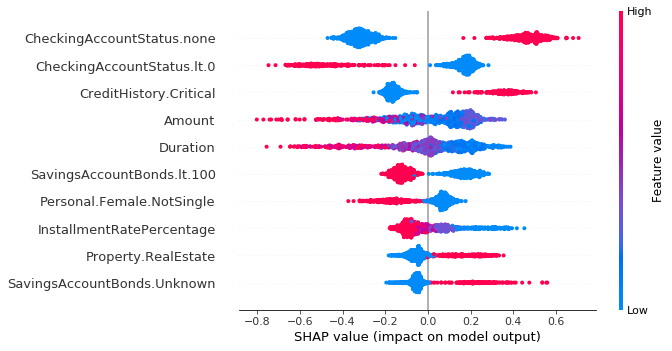

In [76]:
shap.summary_plot(shap_values, X, max_display=10)

In [77]:
import lightgbm as lgb

lgb1 = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 20
params['max_depth'] = 10

lgb2 = lgb.train(params, lgb1, 100)

[LightGBM] [Info] Number of positive: 484, number of negative: 216
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691429 -> initscore=0.806806
[LightGBM] [Info] Start training from score 0.806806


In [78]:
y_pred = (lgb2.predict(X_test) >0.5)*1
y_pred = gbf.predict(X_test)
print("Light GBM accuracy = ", accuracy_score(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

Light GBM accuracy =  0.75


array([[ 42,  42],
       [ 33, 183]])

## Conclusions I: None of the classifiers much better than the naive method. 
## Conclusions II: Classifiers with some averaging tend to do better. 